In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
import api_keys
from api_keys import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
#Create Dataframe to hold API Data
coordinates_df = pd.DataFrame()

#Create lists to hold API Data
cities = []
countries = []
#set the amount of cities to be searched
sizes = 500

#Create a set of random lat and lng combinations
coordinates_df["rndLatitude"] = np.random.uniform(low=-90.000, high=90.000, size=sizes)
coordinates_df["rndLongitude"] = np.random.uniform(low=-180.000, high=180.000, size=sizes)

#Iterate through each row for the lat and lng values 
for index, row in coordinates_df.iterrows():
    lat = row["rndLatitude"]
    lng = row["rndLongitude"]
    #use citipy to find the closest city to the randomly generated coordinates
    cities.append(citipy.nearest_city(lat, lng).city_name)
    countries.append(citipy.nearest_city(lat, lng).country_code)

#add the cities and country codes to the DataFrame
coordinates_df["Closest City"] = cities
coordinates_df["Country"] = countries

#create empty DataFrames
coordinates_df["Temperature"] = ""
coordinates_df["Humidity"] = ""
coordinates_df["Cloud Coverage"] = ""
coordinates_df["Wind Speed"] = ""
coordinates_df["cityLon"] = ""
coordinates_df["cityLat"] = ""

coordinates_df.head(10)

,rndLatitude,rndLongitude,Closest City,Country,Temperature,Humidity,Cloud Coverage,Wind Speed,cityLon,cityLat
0,80.515181,-116.829336,norman wells,ca,,,,,,
1,39.368510,157.055227,sentyabrskiy,ru,,,,,,
2,-82.940822,-30.952108,ushuaia,ar,,,,,,
3,5.949629,63.488423,ugoofaaru,mv,,,,,,
4,-63.726114,-25.568497,chuy,uy,,,,,,
5,-40.392923,-66.701720,general roca,ar,,,,,,
6,58.016629,142.146798,okhotsk,ru,,,,,,
7,-63.846668,-84.303924,punta arenas,cl,,,,,,
8,-23.091657,174.231349,isangel,vu,,,,,,
9,79.849617,-46.691113,ilulissat,gl,,,,,,


In [7]:
#Set apikey 
api_key = api_keys.api_key

#Create Lists to hold the city's latitude and longitude 
cityLon = []
cityLat = []

#create an iterrows loop through the DataFrame
print("Beginning Data Retrieval")
print("-------------------------------")

counter = 1
error_counter = 0

for index, row in coordinates_df.iterrows():
    city = row["Closest City"]
    ccode = row["Country"]
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city},{ccode}&appid=" + api_key + "&units=imperial"
    gmap_url = "https://maps.googleapis.com/maps/api/geocode/json?address=%s,%s&&key=%s" % (city, ccode, gkey)
    
    #try-except get request for each the weather api and google api 
    try:
        try:
            response_json = requests.get(query_url).json()
            #append the lists with the queries
            cityLon.append(response_json["coord"]["lon"])
            cityLat.append(response_json["coord"]["lat"])
            print("Processing Record " + str(counter) + " of set 1 | " + str(city))
        except:
            response_json_gmap = requests.get(gmap_url).json()
            cityLon.append(response_json_gmap["results"][0]['geometry']['location']['lng'])
            cityLat.append(response_json_gmap["results"][0]['geometry']['location']['lat'])
            print("Processing Record " + str(counter) + " of set 1 | " + str(city))
    except:
        print("City not found: " + str(city))
        cityLon.append(0)
        cityLat.append(0)
        error_counter += 1
    counter += 1
    time.sleep(.5)

coordinates_df["cityLon"] = cityLon
coordinates_df["cityLat"] = cityLat
print(error_counter)

Beginning Data Retrieval
-------------------------------
Processing Record 1 of set 1 | norman wells
Processing Record 2 of set 1 | sentyabrskiy
Processing Record 3 of set 1 | ushuaia
Processing Record 4 of set 1 | ugoofaaru
Processing Record 5 of set 1 | chuy
Processing Record 6 of set 1 | general roca
Processing Record 7 of set 1 | okhotsk
Processing Record 8 of set 1 | punta arenas
Processing Record 9 of set 1 | isangel
Processing Record 10 of set 1 | ilulissat
Processing Record 11 of set 1 | cape town
Processing Record 12 of set 1 | smoky lake
Processing Record 13 of set 1 | yandyki
Processing Record 14 of set 1 | aguilas
Processing Record 15 of set 1 | lulea
Processing Record 16 of set 1 | bengkulu
Processing Record 17 of set 1 | mataura
Processing Record 18 of set 1 | illoqqortoormiut
Processing Record 19 of set 1 | mineiros
Processing Record 20 of set 1 | nizhneyansk
Processing Record 21 of set 1 | nizhneyansk
Processing Record 22 of set 1 | mayumba
Processing Record 23 of set 1

Processing Record 195 of set 1 | udachnyy
Processing Record 196 of set 1 | georgetown
Processing Record 197 of set 1 | punta arenas
Processing Record 198 of set 1 | victoria
Processing Record 199 of set 1 | bluff
Processing Record 200 of set 1 | mys shmidta
Processing Record 201 of set 1 | cockburn town
Processing Record 202 of set 1 | taolanaro
Processing Record 203 of set 1 | kambove
Processing Record 204 of set 1 | ostrovnoy
Processing Record 205 of set 1 | bambous virieux
Processing Record 206 of set 1 | sangar
Processing Record 207 of set 1 | klaksvik
Processing Record 208 of set 1 | upernavik
Processing Record 209 of set 1 | hermanus
Processing Record 210 of set 1 | mataura
Processing Record 211 of set 1 | hermanus
Processing Record 212 of set 1 | klaksvik
Processing Record 213 of set 1 | palmer
Processing Record 214 of set 1 | yellowknife
Processing Record 215 of set 1 | havoysund
Processing Record 216 of set 1 | muros
Processing Record 217 of set 1 | atuona
Processing Record 21

Processing Record 388 of set 1 | port hardy
Processing Record 389 of set 1 | arraial do cabo
Processing Record 390 of set 1 | ushuaia
Processing Record 391 of set 1 | spokane
Processing Record 392 of set 1 | kapaa
Processing Record 393 of set 1 | new norfolk
Processing Record 394 of set 1 | beloha
Processing Record 395 of set 1 | oktyabrskoye
Processing Record 396 of set 1 | marcona
Processing Record 397 of set 1 | mount gambier
Processing Record 398 of set 1 | tiksi
Processing Record 399 of set 1 | mar del plata
Processing Record 400 of set 1 | kavaratti
Processing Record 401 of set 1 | brae
Processing Record 402 of set 1 | kapaa
Processing Record 403 of set 1 | hasaki
Processing Record 404 of set 1 | molteno
Processing Record 405 of set 1 | isangel
Processing Record 406 of set 1 | hilo
Processing Record 407 of set 1 | susehri
Processing Record 408 of set 1 | kovylkino
Processing Record 409 of set 1 | cape town
Processing Record 410 of set 1 | houston
Processing Record 411 of set 1 | 

In [8]:
coordinates_df.head()

,rndLatitude,rndLongitude,Closest City,Country,Temperature,Humidity,Cloud Coverage,Wind Speed,cityLon,cityLat
0,80.515181,-116.829336,norman wells,ca,,,,,-126.830000,65.280000
1,39.368510,157.055227,sentyabrskiy,ru,,,,,72.196389,60.493056
2,-82.940822,-30.952108,ushuaia,ar,,,,,-68.310000,-54.810000
3,5.949629,63.488423,ugoofaaru,mv,,,,,73.000000,5.670000
4,-63.726114,-25.568497,chuy,uy,,,,,-53.460000,-33.690000


In [9]:
temperature = []
humidity = []
cloud_coverage = []
wind_speed = [] 
    
counter = 1
for index, row in coordinates_df.iterrows():
    lon = row["cityLon"]
    lat = row["cityLat"]
    query_url = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + api_key + "&units=imperial"
    
    try:
        response_json = requests.get(query_url).json()
        temperature.append(response_json["main"]["temp"])
        humidity.append(response_json["main"]["humidity"])
        cloud_coverage.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        print("Processing Record " + str(counter) + " of set 2 | " + " Longitude: " + str(lon) +" Latitude: " + str(lat))
    except:
        print("Sorry this city was not found")
    counter += 1
    time.sleep(.5)

coordinates_df["Temperature"] = temperature
coordinates_df["Humidity"] = humidity
coordinates_df["Cloud Coverage"] = cloud_coverage
coordinates_df["Wind Speed"] = wind_speed

Processing Record 1 of set 2 |  Longitude: -126.83 Latitude: 65.28
Processing Record 2 of set 2 |  Longitude: 72.19638909999999 Latitude: 60.493056
Processing Record 3 of set 2 |  Longitude: -68.31 Latitude: -54.81
Processing Record 4 of set 2 |  Longitude: 73.0 Latitude: 5.67
Processing Record 5 of set 2 |  Longitude: -53.46 Latitude: -33.69
Processing Record 6 of set 2 |  Longitude: -67.58 Latitude: -39.03
Processing Record 7 of set 2 |  Longitude: 143.24 Latitude: 59.36
Processing Record 8 of set 2 |  Longitude: -70.91 Latitude: -53.16
Processing Record 9 of set 2 |  Longitude: 169.27 Latitude: -19.55
Processing Record 10 of set 2 |  Longitude: -51.1 Latitude: 69.22
Processing Record 11 of set 2 |  Longitude: 18.42 Latitude: -33.93
Processing Record 12 of set 2 |  Longitude: -112.47 Latitude: 54.11
Processing Record 13 of set 2 |  Longitude: 47.13 Latitude: 45.77
Processing Record 14 of set 2 |  Longitude: -1.58 Latitude: 37.41
Processing Record 15 of set 2 |  Longitude: 22.15 Latit

Processing Record 121 of set 2 |  Longitude: 26.89 Latitude: -33.59
Processing Record 122 of set 2 |  Longitude: -77.65 Latitude: -9.28
Processing Record 123 of set 2 |  Longitude: 57.76 Latitude: -20.34
Processing Record 124 of set 2 |  Longitude: -68.31 Latitude: -54.81
Processing Record 125 of set 2 |  Longitude: 88.39 Latitude: 69.49
Processing Record 126 of set 2 |  Longitude: 67.45 Latitude: 24.14
Processing Record 127 of set 2 |  Longitude: 82.73 Latitude: 51.67
Processing Record 128 of set 2 |  Longitude: -17.92 Latitude: 28.66
Processing Record 129 of set 2 |  Longitude: -42.02 Latitude: -22.97
Processing Record 130 of set 2 |  Longitude: 55.45 Latitude: -4.62
Processing Record 131 of set 2 |  Longitude: 117.88 Latitude: -35.02
Processing Record 132 of set 2 |  Longitude: -52.33 Latitude: 4.94
Processing Record 133 of set 2 |  Longitude: 115.35 Latitude: -33.64
Processing Record 134 of set 2 |  Longitude: -58.74 Latitude: -38.55
Processing Record 135 of set 2 |  Longitude: 115

Processing Record 240 of set 2 |  Longitude: 168.33 Latitude: -46.6
Processing Record 241 of set 2 |  Longitude: -70.91 Latitude: -53.16
Processing Record 242 of set 2 |  Longitude: 73.08 Latitude: -0.6
Processing Record 243 of set 2 |  Longitude: -16.22 Latitude: 15.62
Processing Record 244 of set 2 |  Longitude: 55.45 Latitude: -4.62
Processing Record 245 of set 2 |  Longitude: 146.06 Latitude: -34.29
Processing Record 246 of set 2 |  Longitude: -179.4311219 Latitude: 68.884224
Processing Record 247 of set 2 |  Longitude: -68.31 Latitude: -54.81
Processing Record 248 of set 2 |  Longitude: 25.72 Latitude: 66.5
Processing Record 249 of set 2 |  Longitude: -45.24 Latitude: 60.14
Processing Record 250 of set 2 |  Longitude: 147.06 Latitude: -42.78
Processing Record 251 of set 2 |  Longitude: 49.05 Latitude: -13.19
Processing Record 252 of set 2 |  Longitude: -134.97 Latitude: -23.12
Processing Record 253 of set 2 |  Longitude: 15.64 Latitude: 78.22
Processing Record 254 of set 2 |  Long

Processing Record 358 of set 2 |  Longitude: 26.89 Latitude: -33.59
Processing Record 359 of set 2 |  Longitude: -79.44 Latitude: -1.02
Processing Record 360 of set 2 |  Longitude: 72.19638909999999 Latitude: 60.493056
Processing Record 361 of set 2 |  Longitude: 72.19638909999999 Latitude: 60.493056
Processing Record 362 of set 2 |  Longitude: -90.4 Latitude: 39.51
Processing Record 363 of set 2 |  Longitude: 130.99 Latitude: -25.24
Processing Record 364 of set 2 |  Longitude: -22.43 Latitude: 63.84
Processing Record 365 of set 2 |  Longitude: 50.17 Latitude: -14.27
Processing Record 366 of set 2 |  Longitude: 45.2 Latitude: 48.69
Processing Record 367 of set 2 |  Longitude: -114.34 Latitude: 34.47
Processing Record 368 of set 2 |  Longitude: 117.88 Latitude: -35.02
Processing Record 369 of set 2 |  Longitude: 79.17 Latitude: 52.25
Processing Record 370 of set 2 |  Longitude: -67.52 Latitude: -46.43
Processing Record 371 of set 2 |  Longitude: -70.91 Latitude: -53.16
Processing Record

Processing Record 477 of set 2 |  Longitude: -35.46 Latitude: -5.2
Processing Record 478 of set 2 |  Longitude: 35.6675264 Latitude: 68.878911
Processing Record 479 of set 2 |  Longitude: -68.59 Latitude: 70.47
Processing Record 480 of set 2 |  Longitude: -155.08 Latitude: 19.71
Processing Record 481 of set 2 |  Longitude: -53.46 Latitude: -33.69
Processing Record 482 of set 2 |  Longitude: -25.09 Latitude: 17.2
Processing Record 483 of set 2 |  Longitude: 27.91 Latitude: -33.02
Processing Record 484 of set 2 |  Longitude: -73.76 Latitude: -42.48
Processing Record 485 of set 2 |  Longitude: -149.4850445 Latitude: -23.3470634
Processing Record 486 of set 2 |  Longitude: -155.08 Latitude: 19.71
Processing Record 487 of set 2 |  Longitude: -15.21 Latitude: 64.25
Processing Record 488 of set 2 |  Longitude: -68.31 Latitude: -54.81
Processing Record 489 of set 2 |  Longitude: -21.9628757 Latitude: 70.48556909999999
Processing Record 490 of set 2 |  Longitude: -134.97 Latitude: -23.12
Proces

In [10]:
coordinates_df.head()

,rndLatitude,rndLongitude,Closest City,Country,Temperature,Humidity,Cloud Coverage,Wind Speed,cityLon,cityLat
0,80.515181,-116.829336,norman wells,ca,75.20,41,40,9.17,-126.830000,65.280000
1,39.368510,157.055227,sentyabrskiy,ru,58.44,96,68,2.48,72.196389,60.493056
2,-82.940822,-30.952108,ushuaia,ar,37.40,64,40,5.82,-68.310000,-54.810000
3,5.949629,63.488423,ugoofaaru,mv,81.12,100,80,22.17,73.000000,5.670000
4,-63.726114,-25.568497,chuy,uy,49.71,89,92,7.96,-53.460000,-33.690000


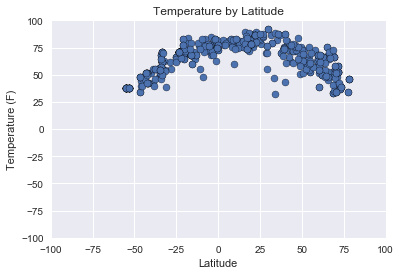

In [17]:
plt.scatter(coordinates_df["cityLat"], coordinates_df["Temperature"], edgecolors="black")
plt.title("Temperature by Latitude")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Temperature (F)")
plt.ylim(-100, 100)
plt.grid()
sns.set()
plt.grid()
plt.savefig("Chart Pictures/Temperature.png")
plt.show()

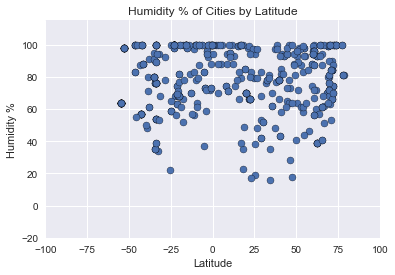

In [12]:
plt.scatter(coordinates_df["cityLat"], coordinates_df["Humidity"], edgecolors="black")
plt.title("Humidity % of Cities by Latitude")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Humidity %")
plt.ylim(-20, 115)
plt.grid()
sns.set()
plt.grid()
plt.savefig("Chart Pictures/Humidity.png")
plt.show()

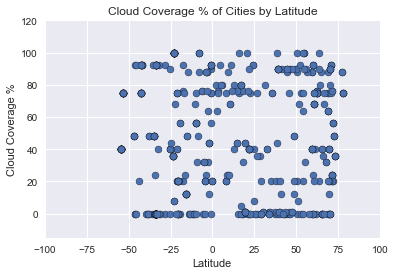

In [13]:
plt.scatter(coordinates_df["cityLat"], coordinates_df["Cloud Coverage"], edgecolors="black")
plt.title("Cloud Coverage % of Cities by Latitude")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Cloud Coverage %")
plt.ylim(-15, 120)
plt.grid()
sns.set()
plt.grid()
plt.savefig("Chart Pictures/CloudCoverage.png")
plt.show()

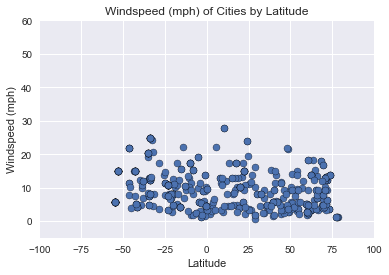

In [14]:
plt.scatter(coordinates_df["cityLat"], coordinates_df["Wind Speed"], edgecolors="black")
plt.title("Windspeed (mph) of Cities by Latitude")
plt.xlabel("Latitude")
plt.xlim(-100, 100)
plt.ylabel("Windspeed (mph)")
plt.ylim(-5, 60)
plt.grid()
sns.set()
plt.grid()
plt.savefig("Chart Pictures/WindSpeed.png")
plt.show()

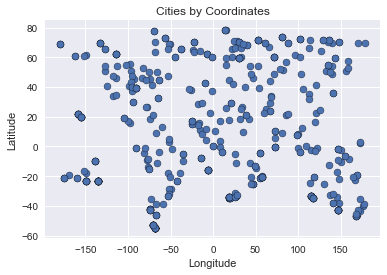

In [15]:
plt.scatter(coordinates_df["cityLon"], coordinates_df["cityLat"], edgecolors="black")
plt.title("Cities by Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
sns.set()
plt.grid()
plt.savefig("Chart Pictures/Citiesbycoordinates.png")
plt.show()

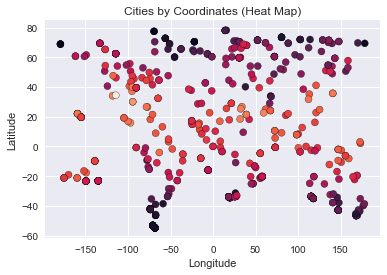

In [16]:
plt.scatter(coordinates_df["cityLon"], coordinates_df["cityLat"], c=coordinates_df["Temperature"], edgecolors="black")
plt.title("Cities by Coordinates (Heat Map)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("Chart Pictures/Citiesbycoordinates_heatmap.png")
plt.show()